In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# WEEK 1

In [2]:
diabetes = pd.read_csv("health care diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

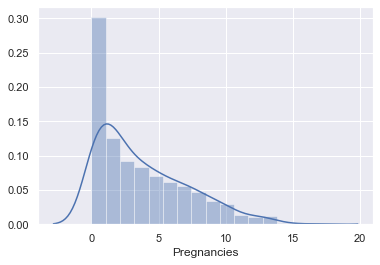

In [6]:
sns.distplot(diabetes['Pregnancies'])

In [7]:
a1 = diabetes['Pregnancies'].quantile(0.99)

In [8]:
diabetes1 = diabetes[diabetes['Pregnancies']<a1]

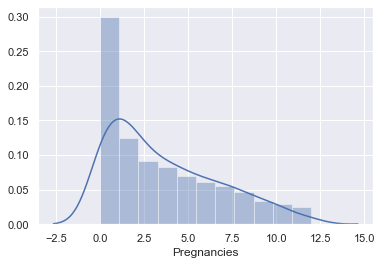

In [9]:
sns.distplot(diabetes1['Pregnancies'])

In [10]:
a2 = diabetes1['Pregnancies'].quantile(0.1)

In [11]:
diabetes2 = diabetes1[diabetes1['Pregnancies']>a2]

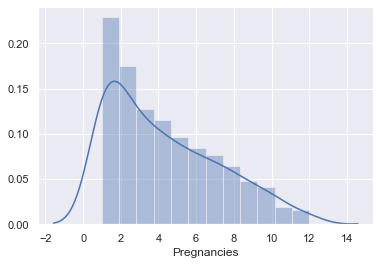

In [12]:
sns.distplot(diabetes2['Pregnancies'])

In [13]:
a4 = diabetes2['Pregnancies'].quantile(0.25)

In [14]:
diabetes4 = diabetes2[diabetes2['Pregnancies']>a4]

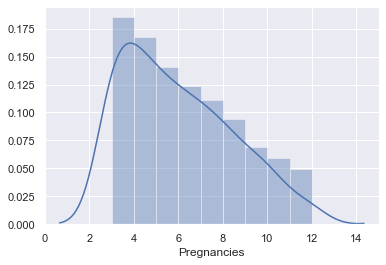

In [15]:
sns.distplot(diabetes4['Pregnancies'])

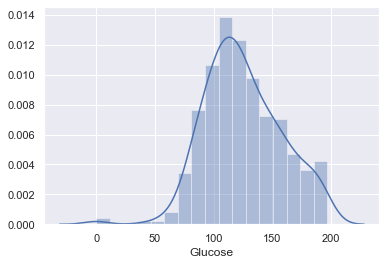

In [16]:
sns.distplot(diabetes4['Glucose'])

In [17]:
a6 = diabetes4['Glucose'].quantile(0.05)

In [18]:
diabetes6 = diabetes4[diabetes4['Glucose']>a6]

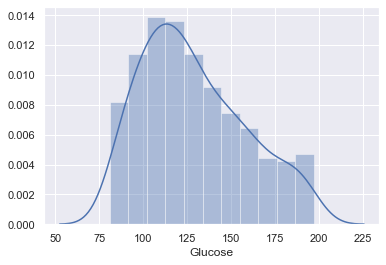

In [19]:
sns.distplot(diabetes6['Glucose'])

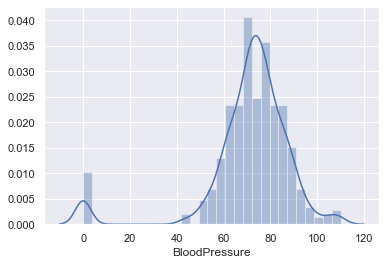

In [20]:
sns.distplot(diabetes6['BloodPressure'])

In [21]:
a8 = diabetes6['BloodPressure'].quantile(0.1)

In [22]:
diabetes8 = diabetes6[diabetes6['BloodPressure']>a8]

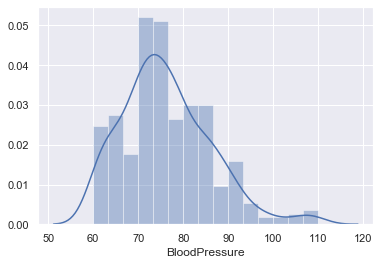

In [23]:
sns.distplot(diabetes8['BloodPressure'])

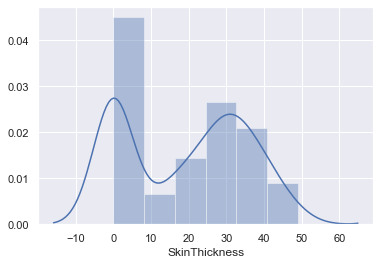

In [24]:
sns.distplot(diabetes8['SkinThickness'])

In [25]:
a9 = diabetes8['SkinThickness'].quantile(0.05)

In [26]:
diabetes9 = diabetes8[diabetes8['SkinThickness']>a9]

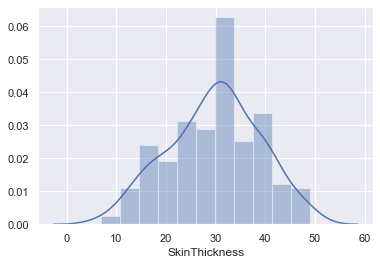

In [27]:
sns.distplot(diabetes9['SkinThickness'])

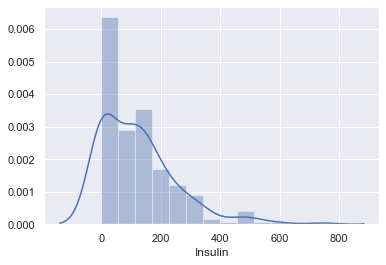

In [28]:
sns.distplot(diabetes9['Insulin'])

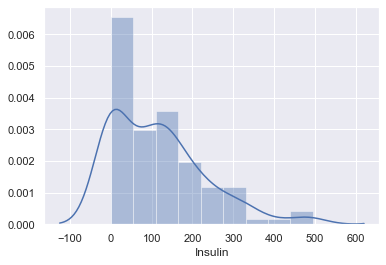

In [29]:
a10 = diabetes9['Insulin'].quantile(0.99)
diabetes10 = diabetes9[diabetes9['Insulin']<a10]
sns.distplot(diabetes10['Insulin'])

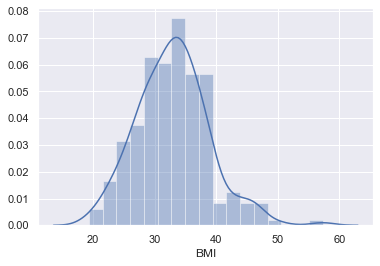

In [30]:
sns.distplot(diabetes10['BMI'])

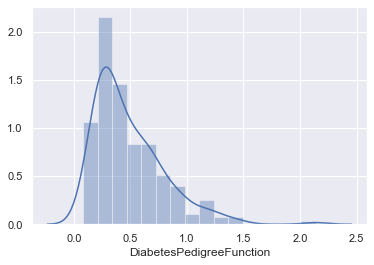

In [31]:
sns.distplot(diabetes10['DiabetesPedigreeFunction'])

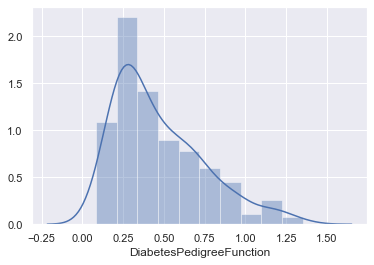

In [32]:
a11 = diabetes10['DiabetesPedigreeFunction'].quantile(0.99)
diabetes11 = diabetes10[diabetes10['DiabetesPedigreeFunction']<a11]
sns.distplot(diabetes11['DiabetesPedigreeFunction'])

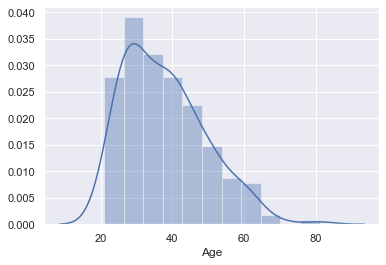

In [33]:
sns.distplot(diabetes11['Age'])

In [34]:
diabetes_cleaned = diabetes11.reset_index(drop=True)

In [35]:
diabetes_cleaned.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,6.071090,129.009479,75.663507,29.540284,114.549763,32.974882,0.471720,37.857820,0.459716
std,2.591133,30.139515,9.937689,8.994815,113.287923,5.880224,0.274982,11.372845,0.499560
min,3.000000,81.000000,60.000000,7.000000,0.000000,19.300000,0.085000,21.000000,0.000000
25%,4.000000,103.500000,70.000000,23.500000,0.000000,29.000000,0.259500,28.000000,0.000000
50%,6.000000,125.000000,74.000000,31.000000,105.000000,32.900000,0.395000,37.000000,0.000000
75%,8.000000,151.000000,82.000000,36.000000,173.000000,36.050000,0.638500,45.000000,1.000000
max,12.000000,196.000000,110.000000,49.000000,495.000000,57.300000,1.353000,81.000000,1.000000


In [36]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               211 non-null    int64  
 1   Glucose                   211 non-null    int64  
 2   BloodPressure             211 non-null    int64  
 3   SkinThickness             211 non-null    int64  
 4   Insulin                   211 non-null    int64  
 5   BMI                       211 non-null    float64
 6   DiabetesPedigreeFunction  211 non-null    float64
 7   Age                       211 non-null    int64  
 8   Outcome                   211 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.0 KB


In [37]:
diabetes_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,211.0,6.071090,2.591133,3.000,4.0000,6.000,8.0000,12.000
Glucose,211.0,129.009479,30.139515,81.000,103.5000,125.000,151.0000,196.000
BloodPressure,211.0,75.663507,9.937689,60.000,70.0000,74.000,82.0000,110.000
SkinThickness,211.0,29.540284,8.994815,7.000,23.5000,31.000,36.0000,49.000
Insulin,211.0,114.549763,113.287923,0.000,0.0000,105.000,173.0000,495.000
BMI,211.0,32.974882,5.880224,19.300,29.0000,32.900,36.0500,57.300
DiabetesPedigreeFunction,211.0,0.471720,0.274982,0.085,0.2595,0.395,0.6385,1.353
Age,211.0,37.857820,11.372845,21.000,28.0000,37.000,45.0000,81.000
Outcome,211.0,0.459716,0.499560,0.000,0.0000,0.000,1.0000,1.000


In [38]:
diabetes_cleaned['Pregnancies'].value_counts()

3     40
4     36
5     28
7     27
6     22
9     17
8     15
10    11
12     8
11     7
Name: Pregnancies, dtype: int64

In [39]:
diabetes_cleaned['Glucose'].value_counts()

129    8
99     7
154    6
109    6
103    6
      ..
130    1
128    1
127    1
122    1
131    1
Name: Glucose, Length: 92, dtype: int64

In [40]:
diabetes_cleaned['BloodPressure'].value_counts()

72     21
74     21
78     18
70     18
68     14
76     13
80     11
62     11
60     11
84     10
64     10
90      9
86      8
88      8
82      7
66      5
85      4
100     2
92      2
110     2
95      1
94      1
75      1
65      1
108     1
106     1
Name: BloodPressure, dtype: int64

In [41]:
diabetes_cleaned['SkinThickness'].value_counts()

32    15
33    15
31    12
27    11
30    10
39     9
40     9
26     8
18     8
15     7
28     7
35     7
23     7
41     6
37     6
29     6
25     5
24     5
19     5
36     5
12     4
22     4
21     4
38     3
42     3
44     3
17     3
34     3
16     2
13     2
11     2
49     2
20     2
48     2
43     2
46     2
7      2
14     1
45     1
47     1
Name: SkinThickness, dtype: int64

In [42]:
diabetes_cleaned['Insulin'].value_counts()

0      68
130     6
105     5
155     4
120     3
       ..
387     1
132     1
144     1
145     1
110     1
Name: Insulin, Length: 96, dtype: int64

In [43]:
diabetes_cleaned['BMI'].value_counts()

27.6    5
31.6    5
33.6    4
35.9    4
32.0    4
       ..
35.8    1
35.3    1
36.9    1
25.1    1
30.2    1
Name: BMI, Length: 125, dtype: int64

In [44]:
diabetes_cleaned['DiabetesPedigreeFunction'].value_counts()

0.443    3
0.260    3
0.150    2
0.268    2
0.439    2
        ..
0.338    1
0.627    1
0.323    1
0.949    1
0.391    1
Name: DiabetesPedigreeFunction, Length: 185, dtype: int64

In [45]:
diabetes_cleaned['Age'].value_counts()

28    14
27     9
37     9
40     8
29     8
45     7
32     7
31     7
30     7
43     7
36     7
25     7
24     7
41     7
34     6
42     6
46     6
51     6
26     6
22     6
38     6
33     5
39     5
48     4
49     4
60     4
35     3
23     3
21     3
50     3
58     3
63     3
52     2
53     2
54     2
55     2
56     2
70     1
44     1
47     1
57     1
61     1
62     1
65     1
81     1
Name: Age, dtype: int64

In [46]:
diabetes_cleaned['Outcome'].value_counts()

0    114
1     97
Name: Outcome, dtype: int64

# WEEK 2

In [47]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               211 non-null    int64  
 1   Glucose                   211 non-null    int64  
 2   BloodPressure             211 non-null    int64  
 3   SkinThickness             211 non-null    int64  
 4   Insulin                   211 non-null    int64  
 5   BMI                       211 non-null    float64
 6   DiabetesPedigreeFunction  211 non-null    float64
 7   Age                       211 non-null    int64  
 8   Outcome                   211 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.0 KB


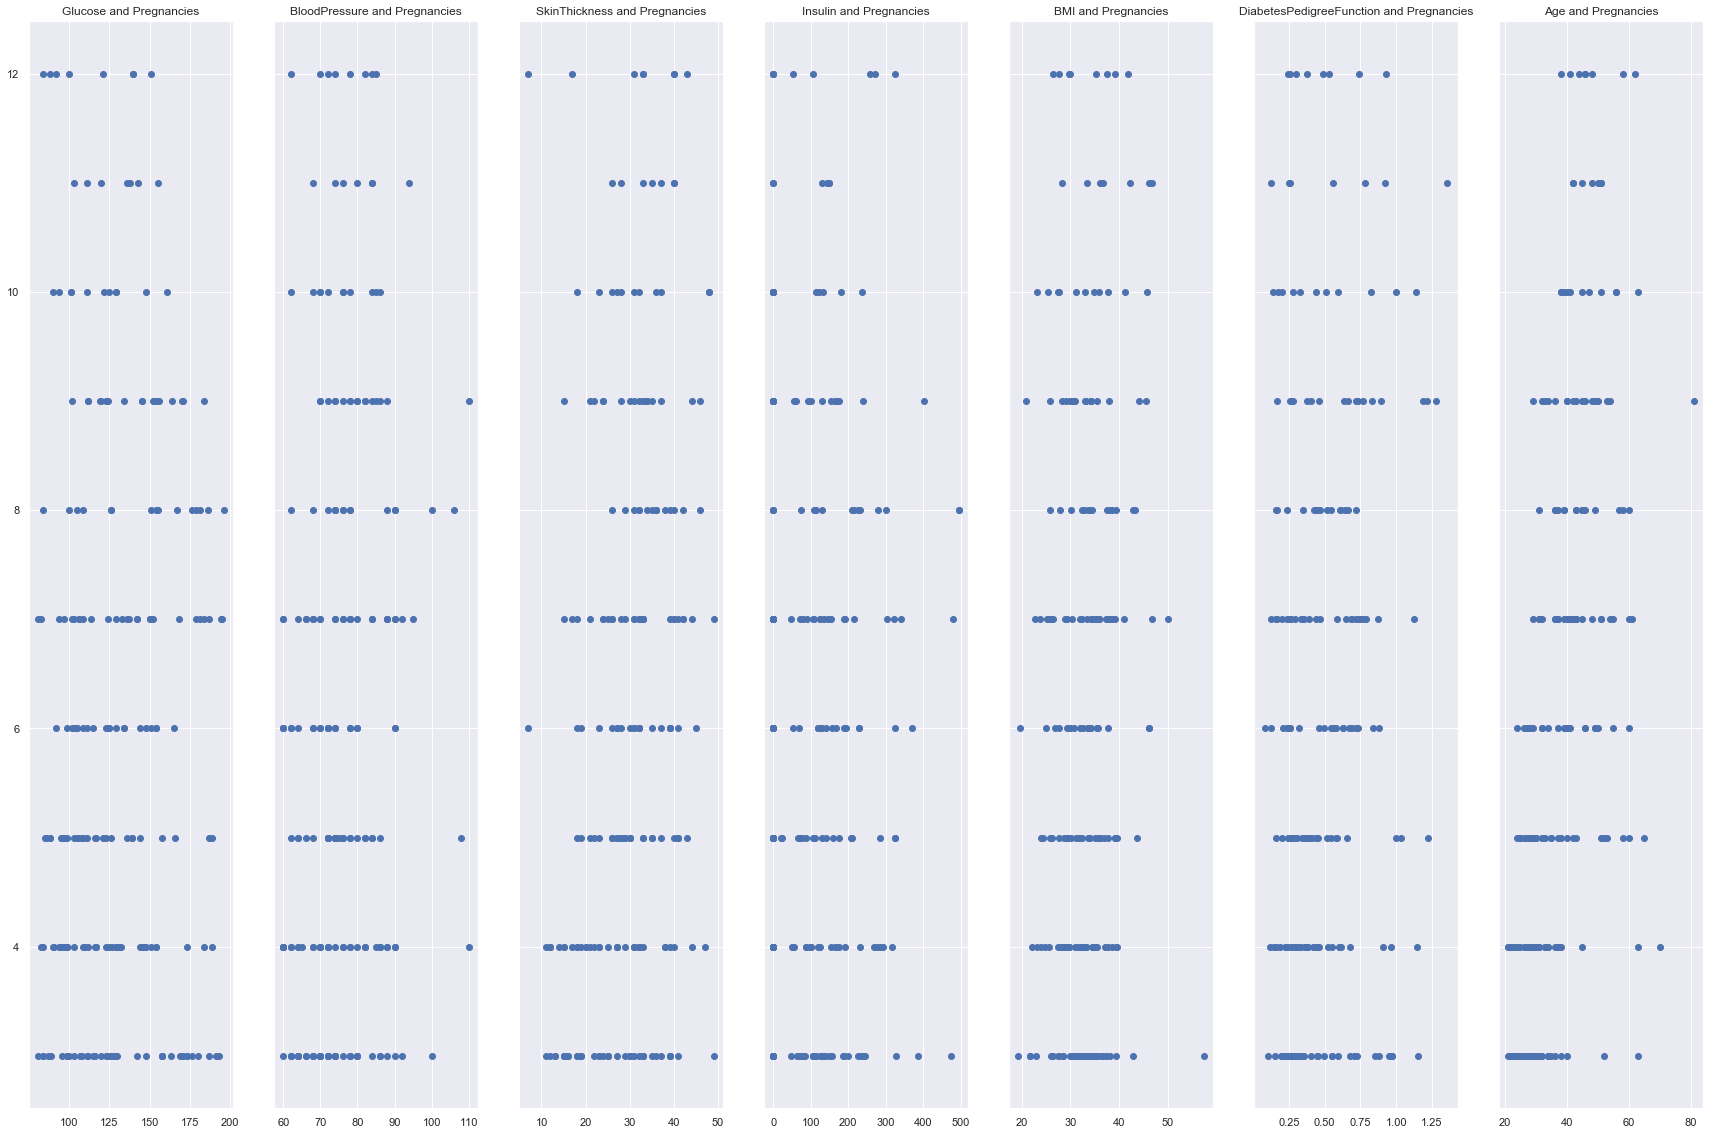

In [48]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['Pregnancies'])
ax1.set_title('Glucose and Pregnancies')
ax2.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['Pregnancies'])
ax2.set_title('BloodPressure and Pregnancies')
ax3.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['Pregnancies'])
ax3.set_title('SkinThickness and Pregnancies')
ax4.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['Pregnancies'])
ax4.set_title('Insulin and Pregnancies')
ax5.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['Pregnancies'])
ax5.set_title('BMI and Pregnancies')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['Pregnancies'])
ax6.set_title('DiabetesPedigreeFunction and Pregnancies')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['Pregnancies'])
ax7.set_title('Age and Pregnancies')


plt.show()

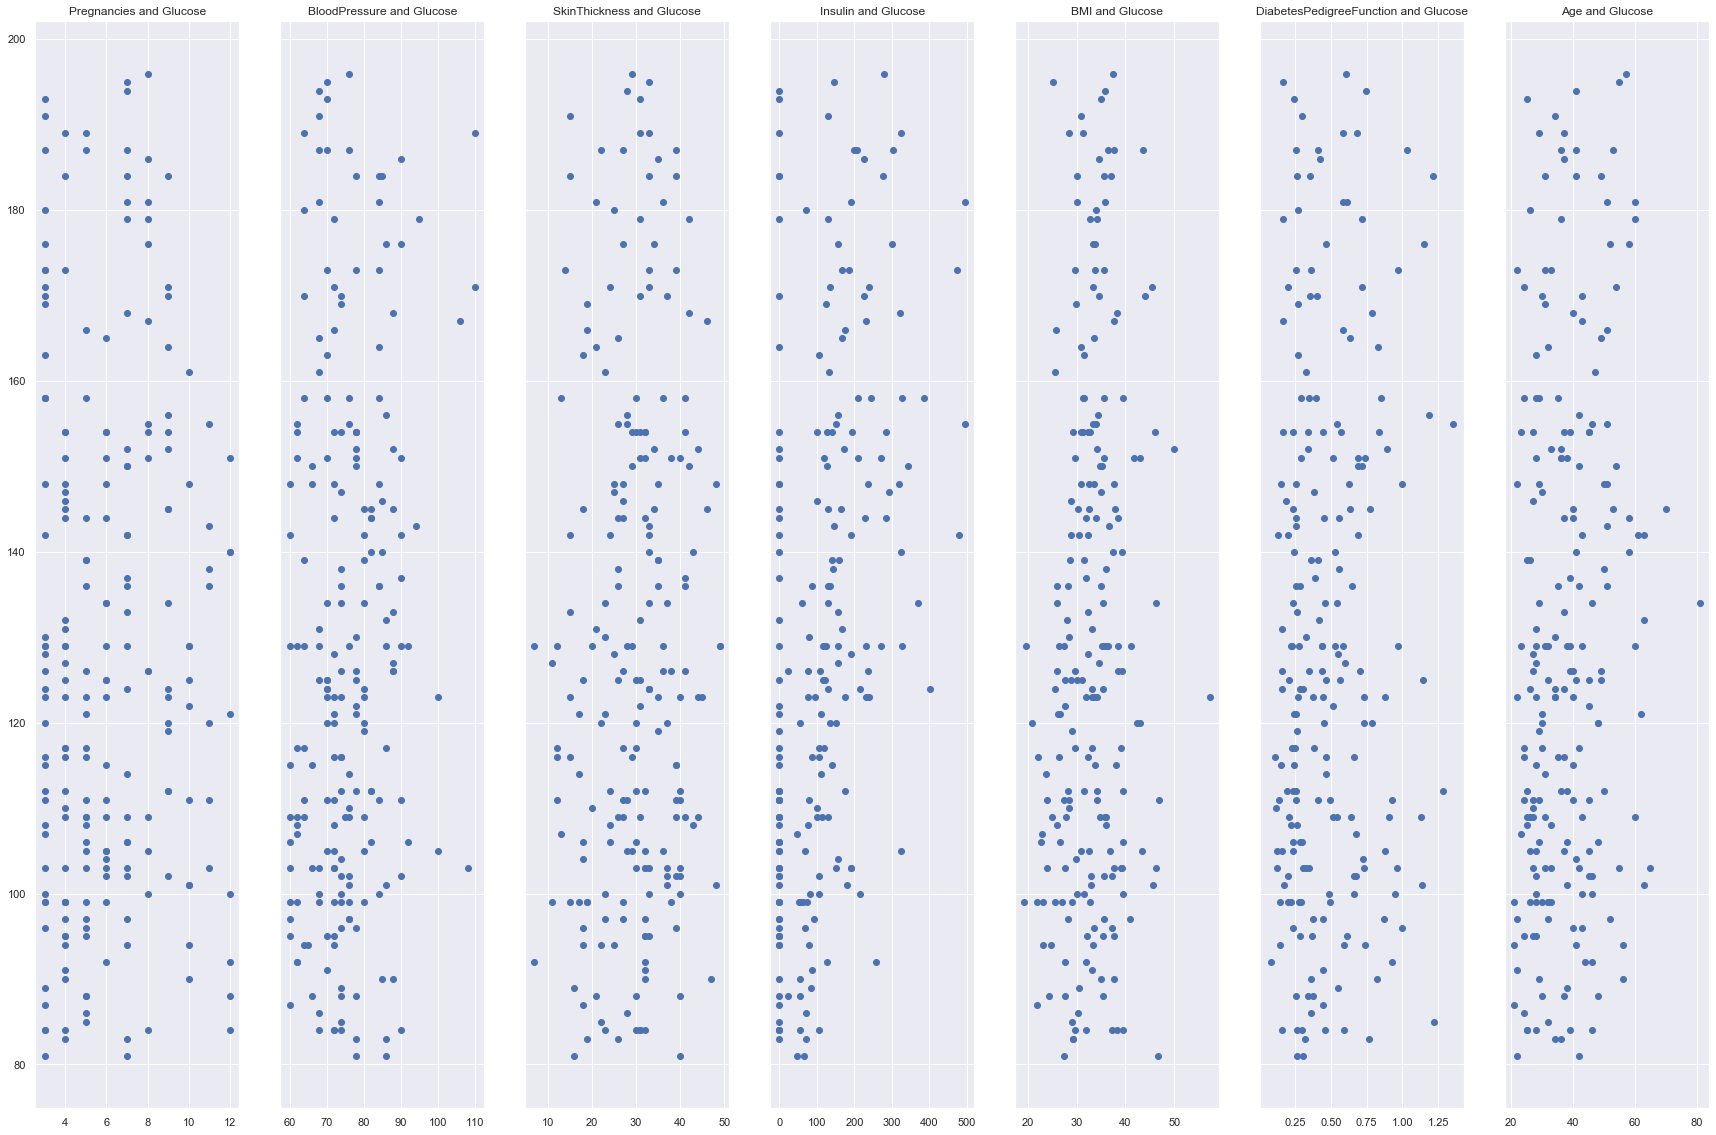

In [49]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['Glucose'])
ax1.set_title('Pregnancies and Glucose')
ax2.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['Glucose'])
ax2.set_title('BloodPressure and Glucose')
ax3.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['Glucose'])
ax3.set_title('SkinThickness and Glucose')
ax4.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['Glucose'])
ax4.set_title('Insulin and Glucose')
ax5.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['Glucose'])
ax5.set_title('BMI and Glucose')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['Glucose'])
ax6.set_title('DiabetesPedigreeFunction and Glucose')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['Glucose'])
ax7.set_title('Age and Glucose')


plt.show()

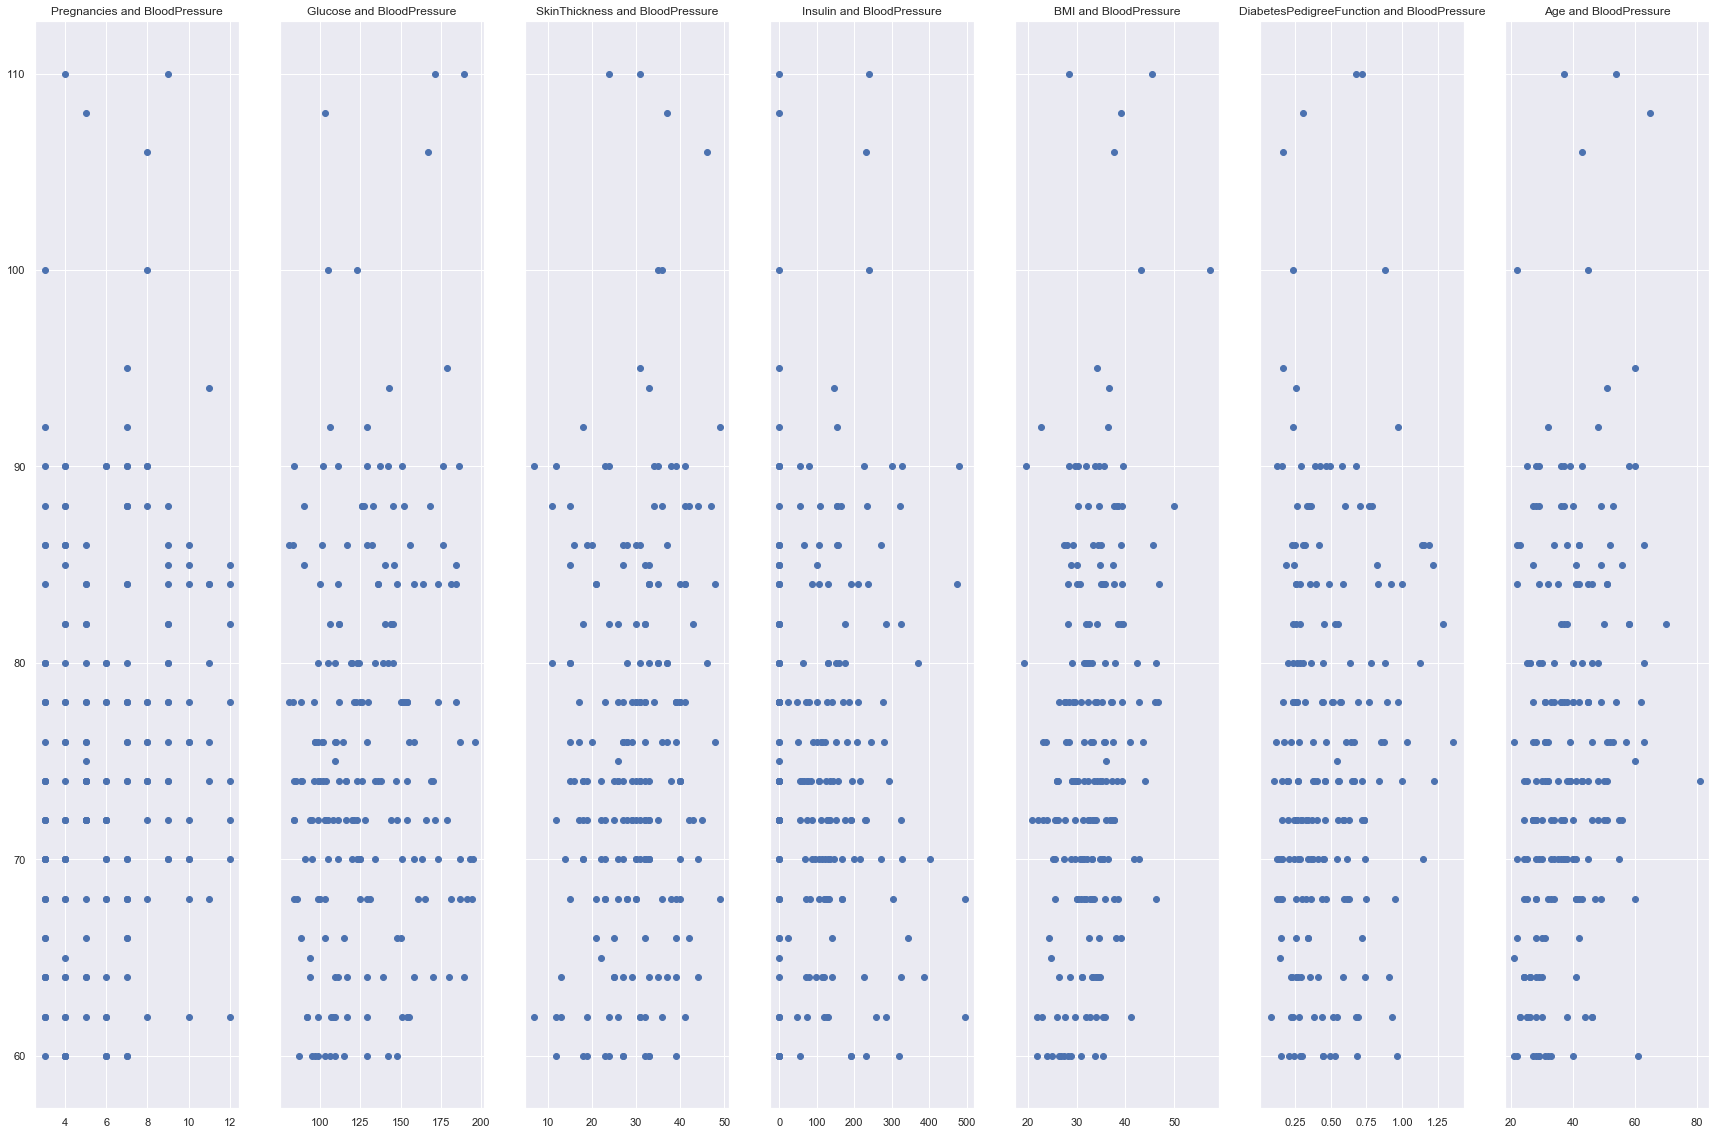

In [50]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['BloodPressure'])
ax1.set_title('Pregnancies and BloodPressure')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['BloodPressure'])
ax2.set_title('Glucose and BloodPressure')
ax3.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['BloodPressure'])
ax3.set_title('SkinThickness and BloodPressure')
ax4.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['BloodPressure'])
ax4.set_title('Insulin and BloodPressure')
ax5.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['BloodPressure'])
ax5.set_title('BMI and BloodPressure')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['BloodPressure'])
ax6.set_title('DiabetesPedigreeFunction and BloodPressure')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['BloodPressure'])
ax7.set_title('Age and BloodPressure')


plt.show()

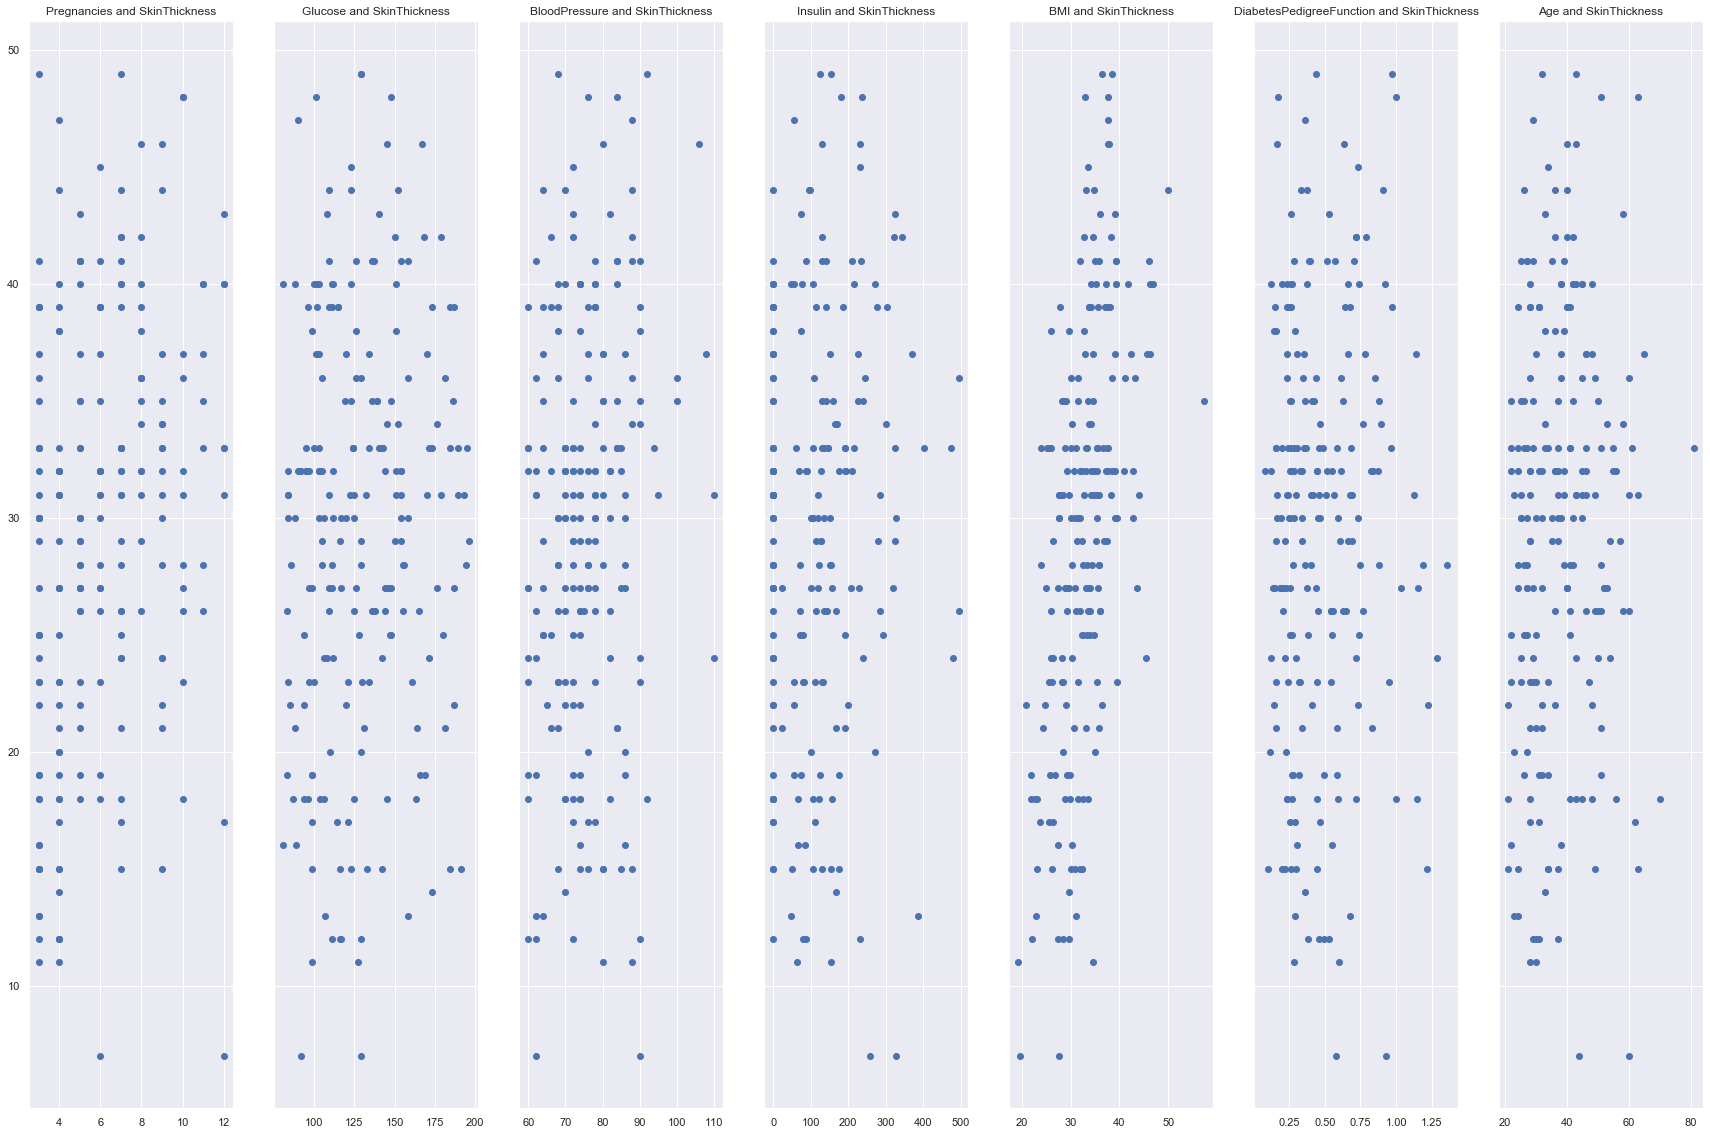

In [51]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['SkinThickness'])
ax1.set_title('Pregnancies and SkinThickness')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['SkinThickness'])
ax2.set_title('Glucose and SkinThickness')
ax3.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['SkinThickness'])
ax3.set_title('BloodPressure and SkinThickness')
ax4.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['SkinThickness'])
ax4.set_title('Insulin and SkinThickness')
ax5.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['SkinThickness'])
ax5.set_title('BMI and SkinThickness')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['SkinThickness'])
ax6.set_title('DiabetesPedigreeFunction and SkinThickness')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['SkinThickness'])
ax7.set_title('Age and SkinThickness')


plt.show()

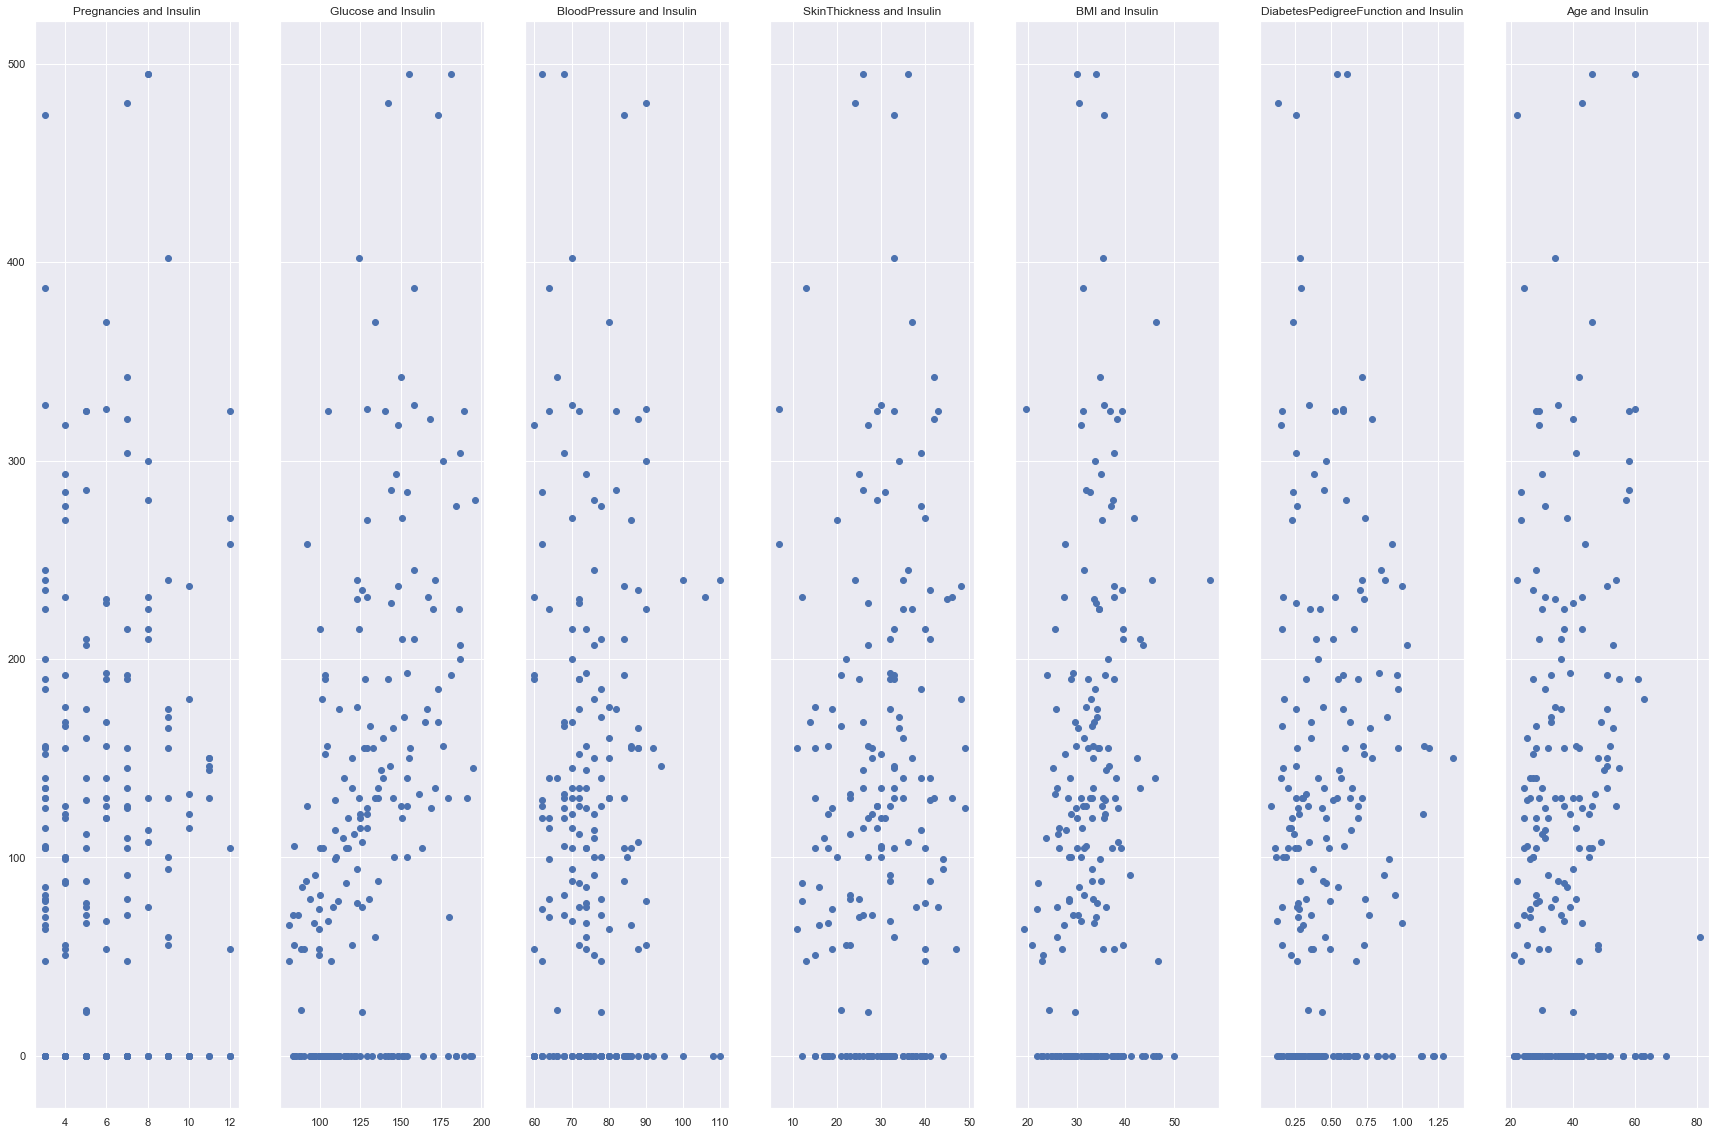

In [52]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['Insulin'])
ax1.set_title('Pregnancies and Insulin')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['Insulin'])
ax2.set_title('Glucose and Insulin')
ax3.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['Insulin'])
ax3.set_title('BloodPressure and Insulin')
ax4.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['Insulin'])
ax4.set_title('SkinThickness and Insulin')
ax5.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['Insulin'])
ax5.set_title('BMI and Insulin')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['Insulin'])
ax6.set_title('DiabetesPedigreeFunction and Insulin')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['Insulin'])
ax7.set_title('Age and Insulin')


plt.show()

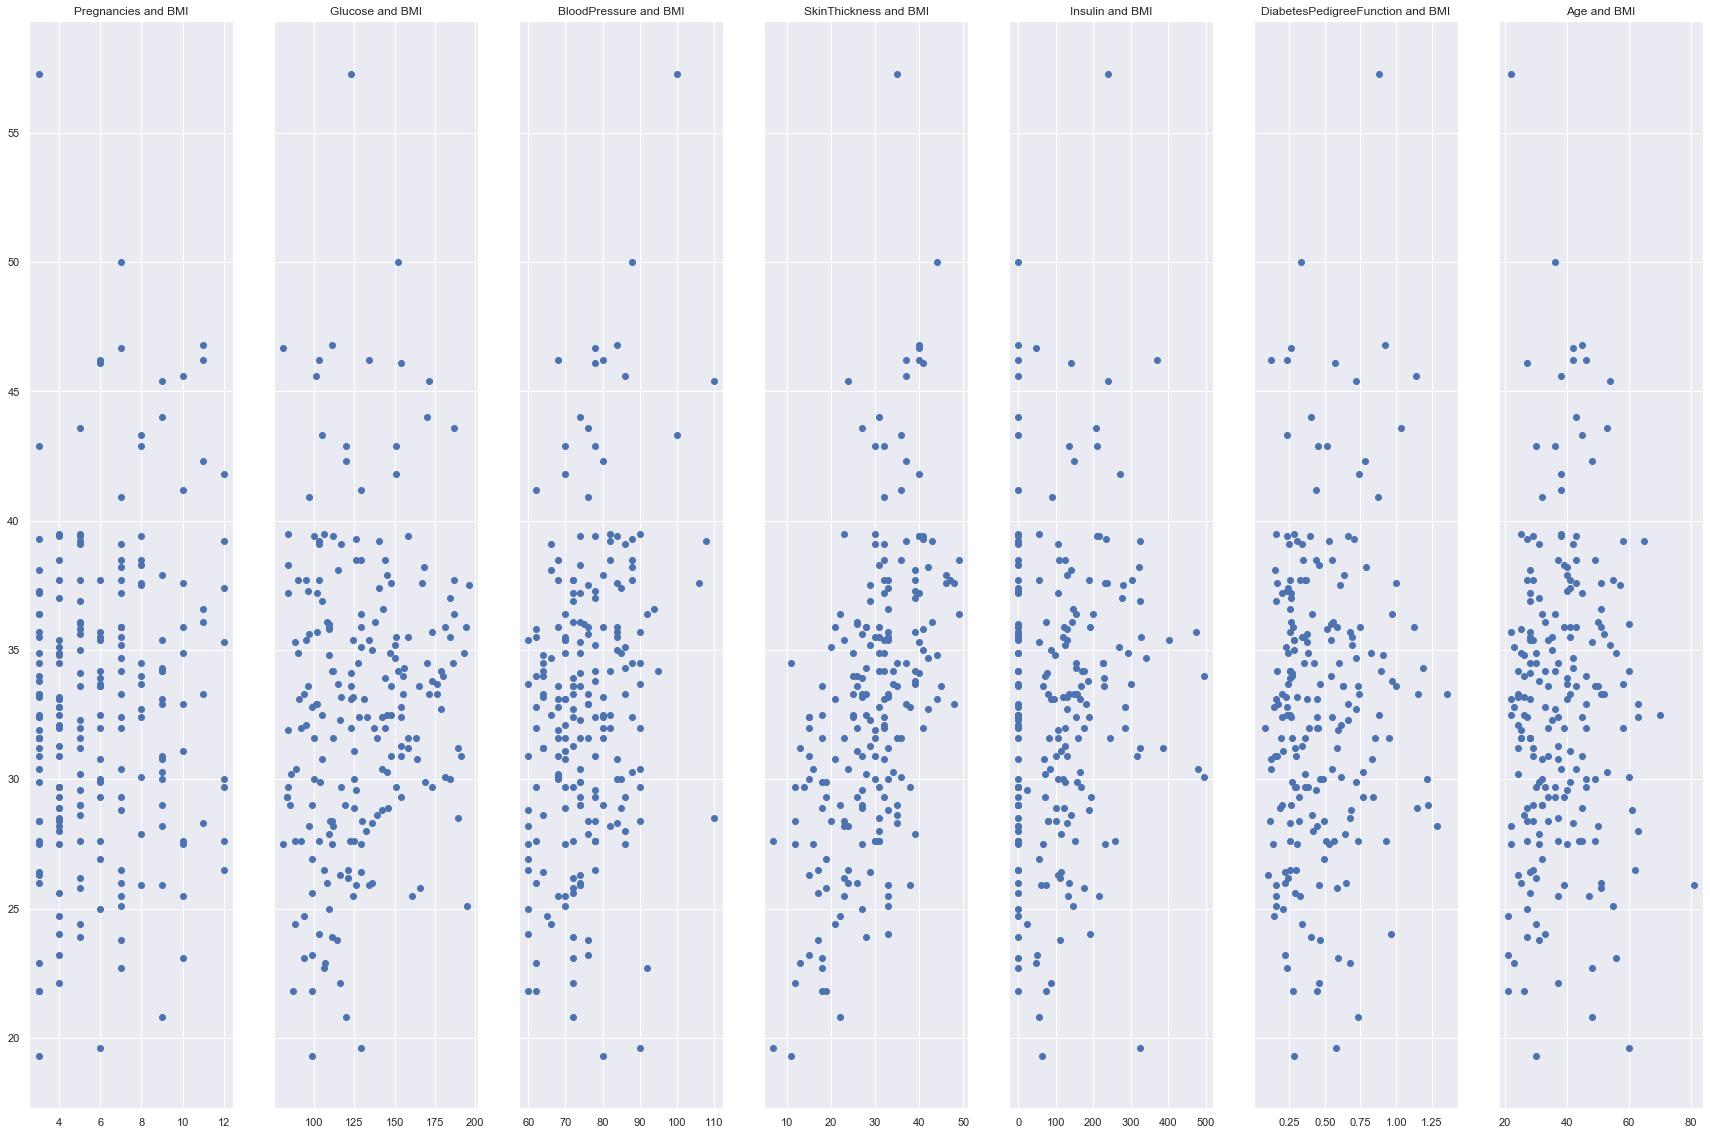

In [53]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['BMI'])
ax1.set_title('Pregnancies and BMI')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['BMI'])
ax2.set_title('Glucose and BMI')
ax3.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['BMI'])
ax3.set_title('BloodPressure and BMI')
ax4.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['BMI'])
ax4.set_title('SkinThickness and BMI')
ax5.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['BMI'])
ax5.set_title('Insulin and BMI')
ax6.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['BMI'])
ax6.set_title('DiabetesPedigreeFunction and BMI')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['BMI'])
ax7.set_title('Age and BMI')


plt.show()

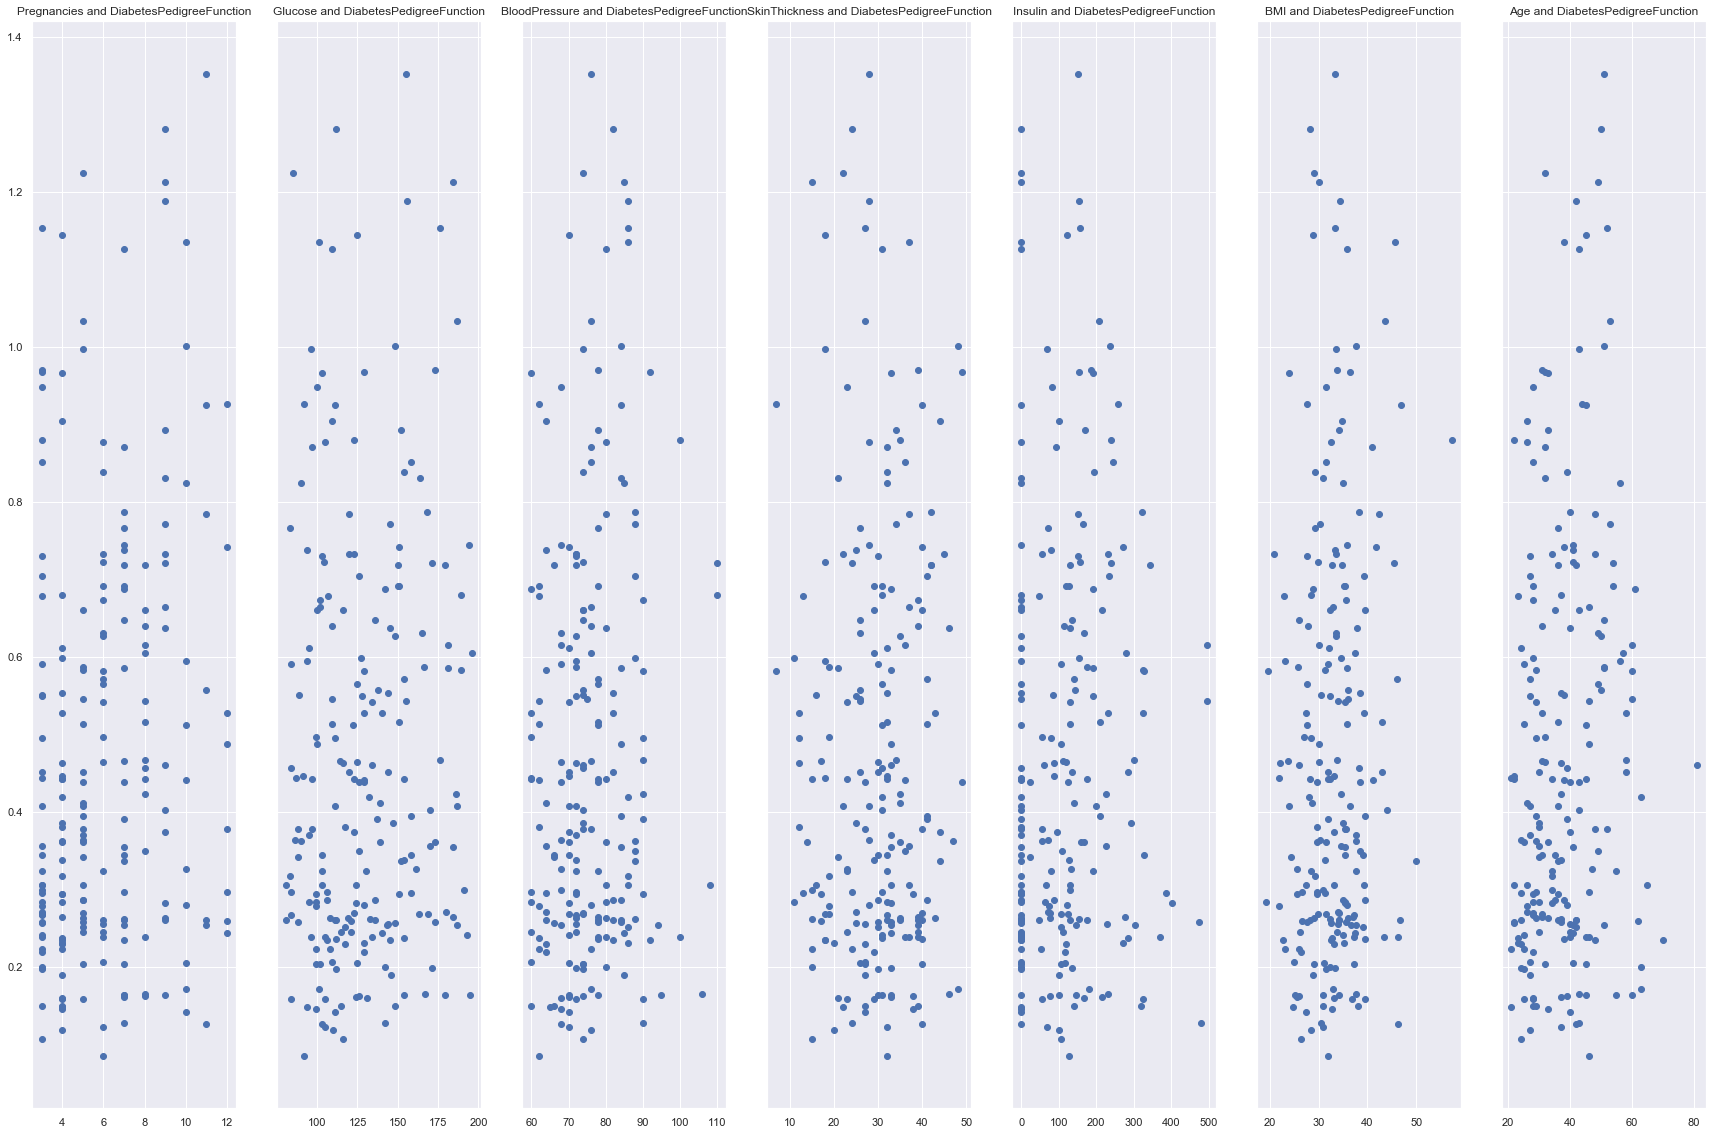

In [54]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax1.set_title('Pregnancies and DiabetesPedigreeFunction')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax2.set_title('Glucose and DiabetesPedigreeFunction')
ax3.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax3.set_title('BloodPressure and DiabetesPedigreeFunction')
ax4.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax4.set_title('SkinThickness and DiabetesPedigreeFunction')
ax5.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax5.set_title('Insulin and DiabetesPedigreeFunction')
ax6.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax6.set_title('BMI and DiabetesPedigreeFunction')
ax7.scatter(diabetes_cleaned['Age'],diabetes_cleaned['DiabetesPedigreeFunction'])
ax7.set_title('Age and DiabetesPedigreeFunction')


plt.show()

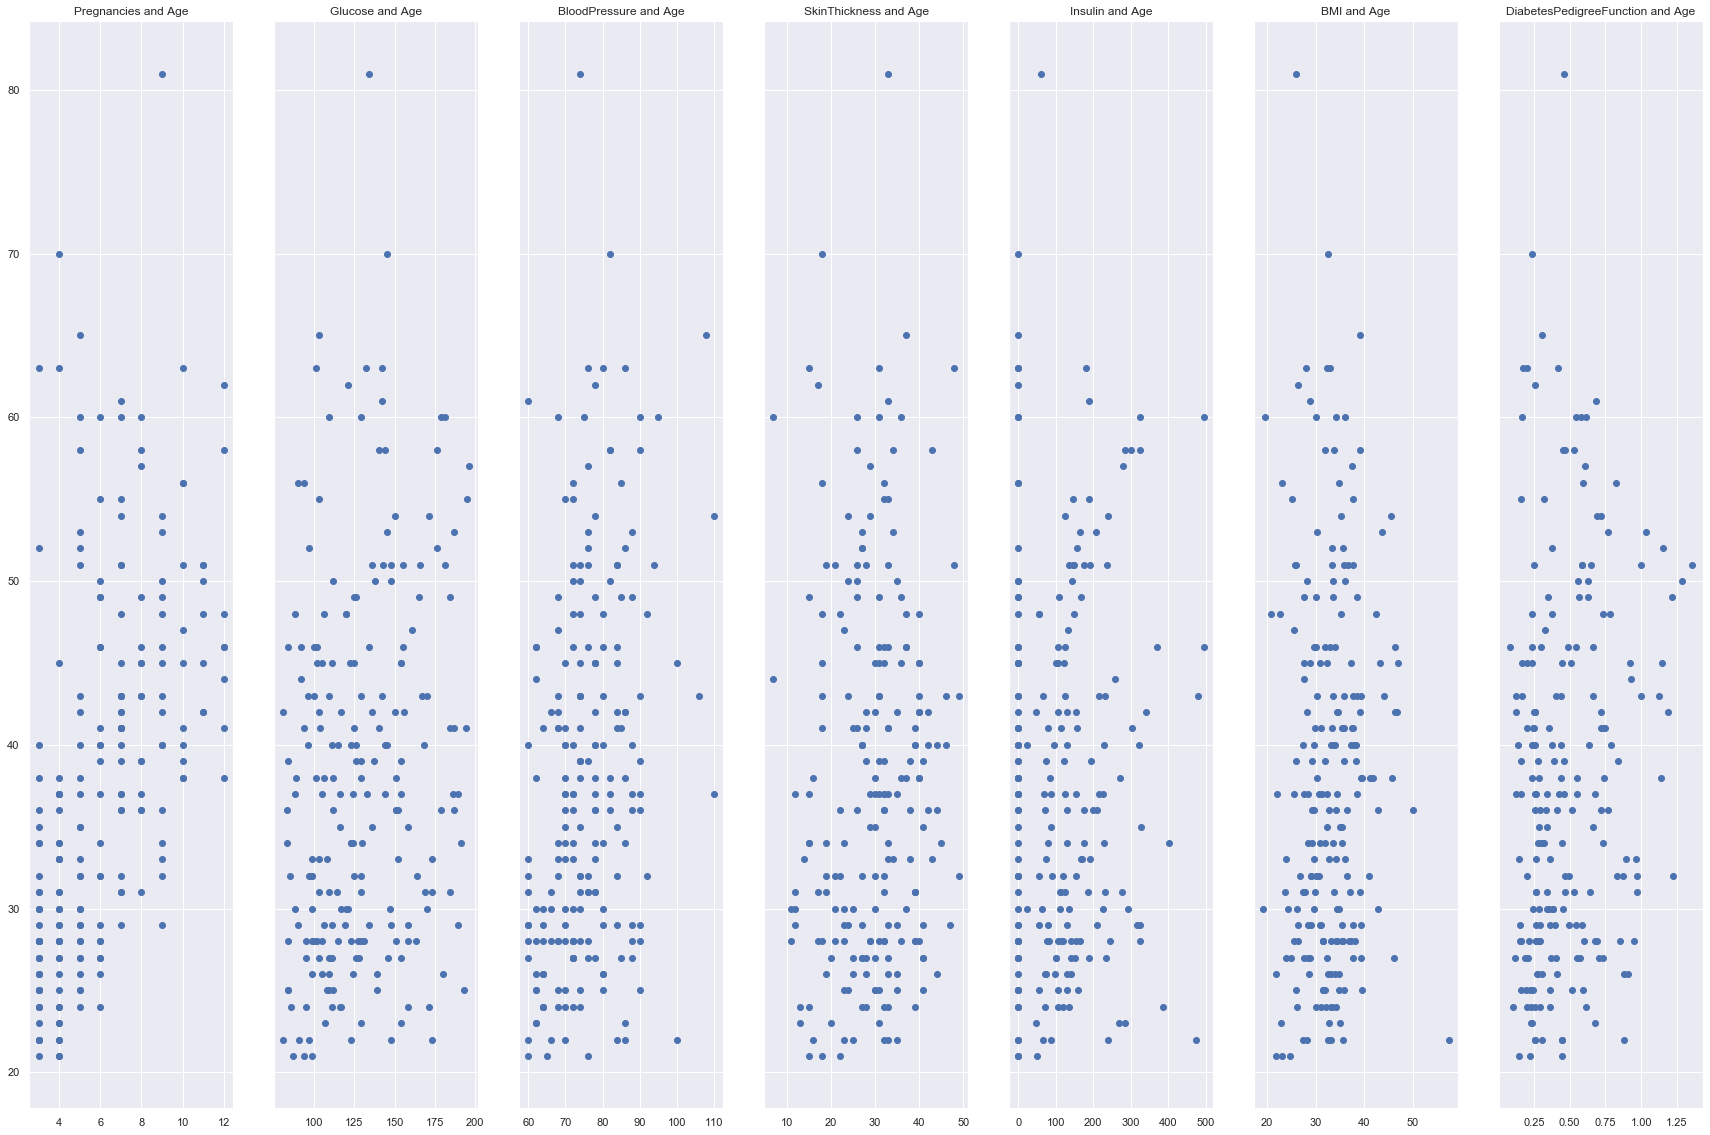

In [55]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize =(30,20)) 
ax1.scatter(diabetes_cleaned['Pregnancies'],diabetes_cleaned['Age'])
ax1.set_title('Pregnancies and Age')
ax2.scatter(diabetes_cleaned['Glucose'],diabetes_cleaned['Age'])
ax2.set_title('Glucose and Age')
ax3.scatter(diabetes_cleaned['BloodPressure'],diabetes_cleaned['Age'])
ax3.set_title('BloodPressure and Age')
ax4.scatter(diabetes_cleaned['SkinThickness'],diabetes_cleaned['Age'])
ax4.set_title('SkinThickness and Age')
ax5.scatter(diabetes_cleaned['Insulin'],diabetes_cleaned['Age'])
ax5.set_title('Insulin and Age')
ax6.scatter(diabetes_cleaned['BMI'],diabetes_cleaned['Age'])
ax6.set_title('BMI and Age')
ax7.scatter(diabetes_cleaned['DiabetesPedigreeFunction'],diabetes_cleaned['Age'])
ax7.set_title('DiabetesPedigreeFunction and Age')


plt.show()

In [56]:
diabetes_cleaned.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.024747,0.162747,0.258028,0.008869,0.159760,0.181344,0.537156,0.261577
Glucose,0.024747,1.000000,0.149219,0.080623,0.432847,0.144382,0.085802,0.197011,0.432049
BloodPressure,0.162747,0.149219,1.000000,0.143589,-0.013598,0.297756,0.105243,0.303188,0.088860
SkinThickness,0.258028,0.080623,0.143589,1.000000,0.073813,0.538646,0.015869,0.077050,0.163828
Insulin,0.008869,0.432847,-0.013598,0.073813,1.000000,0.136508,0.060722,0.047883,0.205782
BMI,0.159760,0.144382,0.297756,0.538646,0.136508,1.000000,0.100233,0.059795,0.221820
DiabetesPedigreeFunction,0.181344,0.085802,0.105243,0.015869,0.060722,0.100233,1.000000,0.170839,0.308174
Age,0.537156,0.197011,0.303188,0.077050,0.047883,0.059795,0.170839,1.000000,0.190086
Outcome,0.261577,0.432049,0.088860,0.163828,0.205782,0.221820,0.308174,0.190086,1.000000


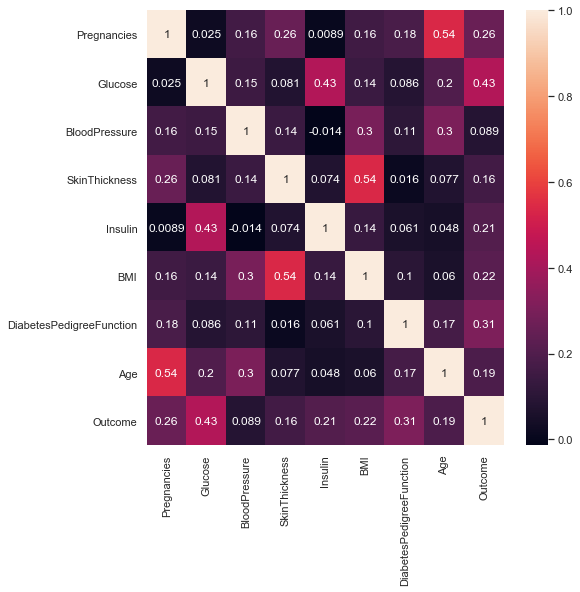

In [57]:
plt.subplots(figsize=(8,8))
sns.heatmap(diabetes_cleaned.corr(),annot=True)

# WEEK 3

In [58]:
target = diabetes_cleaned['Outcome']

In [59]:
inputs = diabetes_cleaned.drop(['Outcome'],axis=1)

In [60]:
inputs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,5,166,72,19,175,25.8,0.587,51
2,3,126,88,41,235,39.3,0.704,27
3,9,119,80,35,0,29.0,0.263,29
4,11,143,94,33,146,36.6,0.254,51


In [62]:
target.head()

0    1
1    1
2    0
3    1
4    1
Name: Outcome, dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
inputs_scaled = scaler.transform(inputs)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression 

In [72]:
logistic = LogisticRegression() 
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred_train = logistic.predict(x_train)

In [77]:
y_pred_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [79]:
y_pred=logistic.predict(x_test)

In [80]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [81]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16, 11],
       [ 6, 10]])

In [82]:
log_acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',log_acc)

Accuracy:  0.6046511627906976


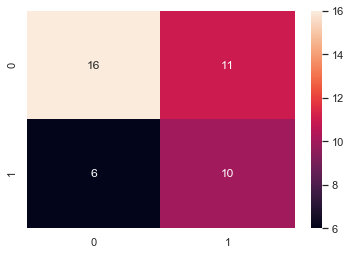

In [83]:
sns.heatmap(cnf_matrix, annot=True)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.48      0.62      0.54        16

    accuracy                           0.60        43
   macro avg       0.60      0.61      0.60        43
weighted avg       0.63      0.60      0.61        43



In [86]:
print('AUC_ROC SCORE: ',metrics.roc_auc_score(y_train, y_pred_train))

AUC_ROC SCORE:  0.7373350361856108


# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
y_pred = classifier.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13, 14],
       [ 6, 10]])

In [95]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_pred,y_test)
KNN_acc

0.5348837209302325

In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.5504385964912282

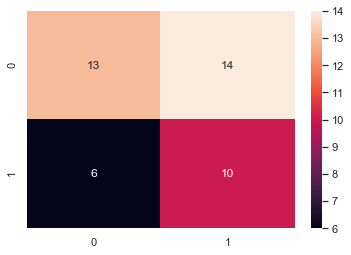

In [97]:
import seaborn as sns
sns.heatmap(cm, annot = True)

# Naives Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
y_pred_nb = classifier.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score
NB_acc = accuracy_score(y_test,y_pred_nb)
NB_acc

0.627906976744186

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_nb)

0.6655092592592593

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[14, 13],
       [ 3, 13]])

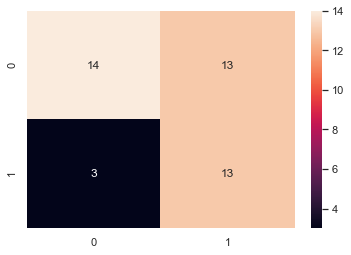

In [103]:
import seaborn as sns
sns.heatmap(cm, annot = True)

# SVM

In [105]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 10, gamma = 0.01)
classifier.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [106]:
y_pred = classifier.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  9],
       [ 7,  9]])

In [108]:
from sklearn.metrics import accuracy_score
SVM_acc = accuracy_score(y_pred,y_test)
SVM_acc

0.627906976744186

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.6100000000000001

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm


In [112]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]#
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [113]:
svc_param_selection(x_train,y_train,5)

{'C': 10, 'gamma': 0.01}

In [114]:
classifier = SVC(kernel = 'rbf', random_state = 0,C = 10, gamma =  0.01)
classifier.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
y_pred = classifier.predict(x_test)

In [116]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [117]:
from sklearn.metrics import accuracy_score
SVM_gscv_acc = accuracy_score(y_test,y_pred)
SVM_gscv_acc

0.6046511627906976

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)


0.5960648148148148

# Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
y_pred = classifier2.predict(x_test)

In [121]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,y_pred)
RF_acc

0.6046511627906976

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6215277777777778

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 12],
       [ 5, 11]])

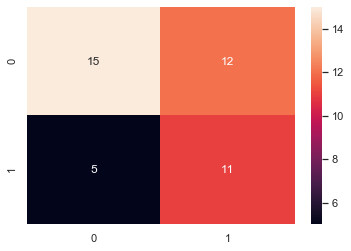

In [124]:
import seaborn as sns
sns.heatmap(cm, annot = True)

# Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,
                                    max_depth = 2, min_samples_leaf = 10, min_samples_split = 20)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [126]:
y_pred = classifier.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_pred,y_test)
DT_acc

0.5813953488372093

In [128]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 12],
       [ 6, 10]])

In [129]:
from sklearn.metrics import roc_auc_score

In [130]:
roc_auc_score(y_test,y_pred)

0.5902777777777778

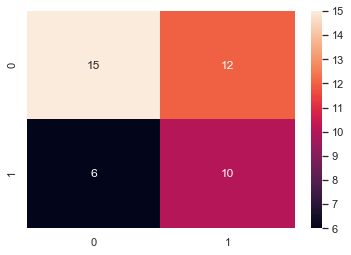

In [132]:
sns.heatmap(cm, annot=True)